# Part I - PROSPER LOAN DATA EXPLORATION

## By :: Tijani Mohammed

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Loading Prosper Loan Data Set

In [2]:
#Import Prosper Loan Dataset

ploan = pd.read_csv('prosperLoanData.csv')

In [3]:
#For better exploration we display all columns

pd.set_option('display.max_columns', None)

In [4]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
ploan.shape

(113937, 81)

In [6]:
ploan.sample(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
4393,2CBA34681269038652FEEEE,433553,2009-11-15 19:18:41.220000000,NaN,36,Completed,2011-11-30 00:00:00,0.37453,0.3500,0.3400,0.18430,0.1400,0.18430,2.0,E,6.0,6,AR,Other,Full-time,163.0,False,False,NaN,2010-02-25 09:56:56,640.0,659.0,1995-02-09 00:00:00,8.0,7.0,12.0,2,101.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3623.0,0.78,977.0,11.0,0.81,0.0,0.55,"$1-24,999",True,1993.333333,9CB835824093972287F3B15,1.0,15.0,15.0,0.0,0.0,2500.0,0.00,-9.0,0,NaN,48,41316,5600,2010-03-19 00:00:00,Q1 2010,1D8A3392760453253C162F2,253.32,8313.68,5600.00,2713.68,-77.54,0.00,0.00,0.00,0.00,1.0,0,0,0.0,60
83180,1E40354466796892176EAC0,579210,2012-04-16 08:14:32.490000000,NaN,12,Completed,2013-05-08 00:00:00,0.11893,0.0817,0.0717,0.07160,0.0330,0.03860,6.0,A,10.0,6,TX,Construction,Employed,123.0,False,False,NaN,2012-04-16 08:14:28,760.0,779.0,2000-03-02 00:00:00,6.0,5.0,13.0,4,76.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1906.0,0.04,41344.0,13.0,1.00,0.0,0.17,"$25,000-49,999",True,3666.666667,9F3B364940481630546EA3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,22,65129,2000,2012-05-08 00:00:00,Q2 2012,EC463545255950624B0FAFB,174.13,2090.05,2000.01,90.04,-11.03,0.00,0.00,0.00,0.00,1.0,0,0,0.0,33
26796,8FBC339339707313426A19A,161299,2007-07-01 10:48:17.340000000,A,36,Completed,2010-07-25 00:00:00,0.13202,0.1250,0.1200,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Retired,49.0,False,False,NaN,2007-07-01 10:15:45.077000000,740.0,759.0,1981-08-01 00:00:00,11.0,7.0,23.0,7,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3684.0,0.49,3816.0,21.0,0.90,1.0,0.33,"$25,000-49,999",True,2083.333333,57BB3395393026739B9D72A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,80,17257,9000,2007-07-25 00:00:00,Q3 2007,4F373392395040979E68DFB,301.08,10839.77,8999.91,1839.86,-73.59,0.00,0.00,0.00,0.00,1.0,0,0,0.0,193
1977,293D3420634449375CF70CE,322485,2008-04-30 16:33:46.990000000,NaN,36,Completed,2013-03-01 00:00:00,0.17291,0.1365,0.1265,NaN,NaN,NaN,NaN,NaN,NaN,1,TX,Other,Retired,304.0,False,True,4707336438924330015F446,2010-08-16 09:45:35,740.0,759.0,1959-10-01 00:00:00,5.0,5.0,22.0,4,66.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1693.0,0.08,3660.0,21.0,0.95,1.0,0.11,"$25,000-49,999",True,3446.416667,21353597020594816890DBA,1.0,19.0,19.0,0.0,0.0,3050.0,0.02,43.0,0,NaN,43,44126,1500,2010-08-26 00:00:00,Q3 2010,DD76336933656694825FD74,51.01,1825.61,1500.00,325.61,-23.86,0.00,0.00,0.00,0.00,1.0,0,0,0.0,36
84417,4CFB347870979132905F08D,451763,2010-03-24 20:06:25.573000000,NaN,36,Com

### Cleaning data set before exploration

> ### Test for correlation before trimming

In [7]:
var_corr = ploan.corr()

In [8]:
var_corr.shape

(64, 64)

In [9]:
var_corr

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,0.127062,0.156224,0.076745,-0.439653,0.269395,0.269395,0.145621,0.195707,0.130369,0.232109,0.184101,-0.298941,-0.280228,-0.233326,-0.024627,-0.078336,-0.045467,-0.073151,0.057056,0.086053,0.036690,0.134729,0.254659,-0.084531,-0.041810,-0.024027,0.076113,0.174834,0.131672,0.132063,0.020873,-0.005101,0.252583,0.164248,-0.126409,-0.370226,-0.155062,-0.939179,0.995095,0.340360,0.277267,-0.380814,-0.366555,-0.281170,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,0.004947,0.082476,0.085339,-0.143751,0.126263,0.126263,0.077072,0.096309,0.076528,0.093637,0.084049,-0.113568,-0.103132,-0.083807,-0.016459,-0.041492,-0.029512,-0.026252,0.026022,0.031535,0.015348,0.079650,0.119342,-0.029476,-0.014670,0.040402,0.028479,0.070311,0.002462,0.003147,-0.002912,-0.008328,0.130493,0.153372,-0.048157,-0.134134,-0.070819,-0.342130,0.335610,0.338927,0.091026,-0.069696,-0.128255,0.158890,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,0.132456,-0.008589,-0.132823,-0.054567,-0.429707,-0.429707,-0.093481,-0.098860,0.002513,-0.110202,-0.043365,0.146119,0.114546,0.149404,0.065679,0.162225,0.122793,0.044095,-0.058539,0.261438,-0.348926,-0.041894,-0.241349,0.103527,0.056327,-0.109975,-0.082338,-0.041467,0.031399,0.018632,0.091034,0.055345,-0.206209,-0.090347,-0.231962,0.088032,-0.185956,-0.073773,-0.036269,-0.322887,-0.226653,-0.111350,-0.180445,0.169726,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,0.102913,-0.019907,-0.134431,-0.001964,-0.461567,-0.461567,-0.097473,-0.105998,-0.005793,-0.125987,-0.055628,0.183810,0.153129,0.176530,0.065645,0.170279,0.128314,0.051169,-0.059608,0.255482,-0.343861,-0.048211,-0.261189,0.114538,0.062917,-0.099540,-0.088982,-0.049270,0.019217,0.006996,0.085770,0.050770,-0.206461,-0.085685,-0.217155,0.136244,-0.172936,0.020420,-0.118721,-0.328960,-0.244742,-0.081055,-0.153722,0.200479,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,0.104395,-0.018954,-0.132993,-0.012683,-0.454350,-0.454350,-0.

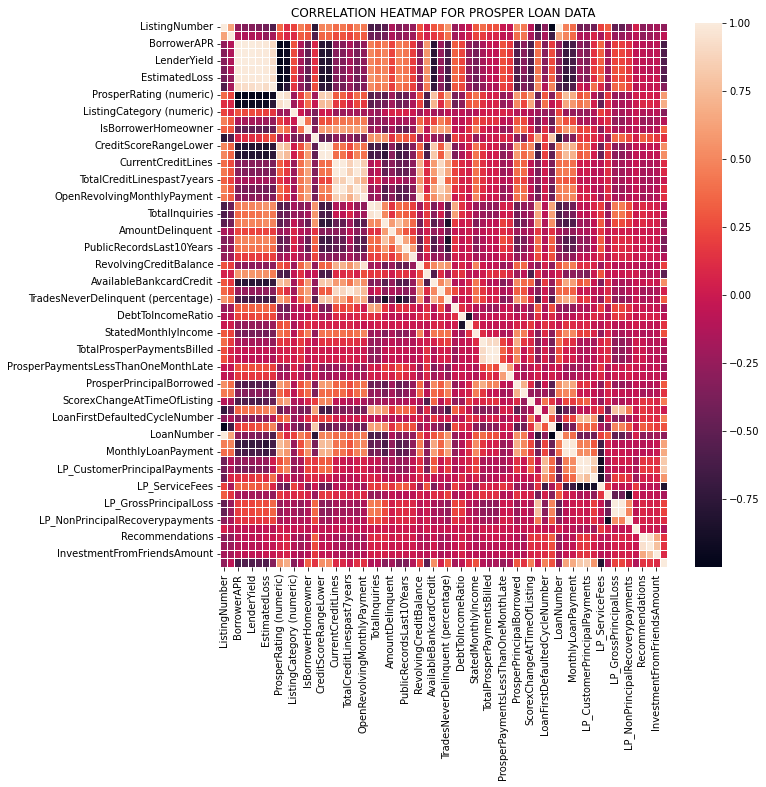

In [10]:
fig, ax = plt.subplots(figsize=(10,10))     
sb.heatmap(var_corr.corr(),linewidths=.5, ax=ax);
plt.title("CORRELATION HEATMAP FOR PROSPER LOAN DATA");

In [11]:
#Save correlation matrix to excell for visual analysis

writer = pd.ExcelWriter('ploan-corr.xlsx')

var_corr.to_excel(writer)
 
# save the excel
writer.save()
print("DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.")

DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.


In [12]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [13]:
#Create a new column for average credit score

ploan['AvgCreditScore'] = (ploan['CreditScoreRangeUpper'] + ploan['CreditScoreRangeLower']) / 2

In [14]:
#The following variables of interest are selected after visual assesment

ploanx = ploan.iloc[:,[62,16,5,63,4,8,9,70,51,15,80,49,48,42,46,18,21,81,3,14,17]]

In [15]:
ploanx.reset_index(drop=True, inplace=True)

> #### Variables of interest after correlation and loan data assesment

In [16]:
ploanx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanNumber                 113937 non-null  int64  
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   LoanOriginalAmount         113937 non-null  int64  
 4   Term                       113937 non-null  int64  
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   LP_InterestandFees         113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   ProsperScore               84853 non-null   float64
 10  Investors                  113937 non-null  int64  
 11  StatedMonthlyIncome        113937 non-null  float64
 12  IncomeVerifiable           113937 non-null  bool   
 13  AvailableBankcardCredit    10

In [17]:
ploanx

,LoanNumber,ListingCategory (numeric),LoanStatus,LoanOriginalAmount,Term,BorrowerRate,LenderYield,LP_InterestandFees,TotalProsperLoans,ProsperScore,Investors,StatedMonthlyIncome,IncomeVerifiable,AvailableBankcardCredit,DebtToIncomeRatio,Occupation,IsBorrowerHomeowner,AvgCreditScore,CreditGrade,ProsperRating (Alpha),BorrowerState
0,19141,0,Completed,9425,36,0.1580,0.1380,1971.1400,NaN,NaN,258,3083.333333,True,1500.0,0.17,Other,True,649.5,C,NaN,CO
1,134815,2,Current,10000,36,0.0920,0.0820,0.0000,NaN,7.0,1,6125.000000,True,10266.0,0.18,Professional,False,689.5,NaN,A,CO
2,6466,0,Completed,3001,36,0.2750,0.2400,1185.6300,NaN,NaN,41,2083.333333,True,NaN,0.06,Other,False,489.5,HR,NaN,GA
3,77296,16,Current,10000,36,0.0974,0.0874,1052.1100,NaN,9.0,158,2875.000000,True,30754.0,0.15,Skilled Labor,True,809.5,NaN,A,GA
4,102670,2,Current,15000,36,0.2085,0.1985,1256.6300,1.0,4.0,20,9583.333333,True,695.0,0.26,Executive,True,689.5,NaN,D,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,88485,1,Current,10000,36,0.1864,0.1764,1409.0200,NaN,5.0,1,4333.333333,True,1886.0,0.13,Food Service Management,True,709.5,NaN,C,IL
113933,55801,7,FinalPaymentInProgress,2000,36,0.1110,0.1010,333.3900,3.0,8.0,22,8041.666667,True,6658.0,0.11,Professional,True,709.5,NaN,A,PA
113934,123122,1,Current,10000,60,0.2150,0.2050,363.5500,NaN,3.0,119,2875.000000,True,7853.0,0.51,Other,True,709.5,NaN,D,TX
113935,56401,2,Completed,15000,60,0.2605,0.2505,6122.5600,1.0,5.0,274,3875.000000,True,4137.0,0.48,Food Service,True,689.5,NaN,C,GA


In [18]:
#Merge Prosper Rating (Alpha) column to Credit Grade because of duplication of rows

ploanx['CreditGrade'] = ploanx['CreditGrade'].mask(ploanx['CreditGrade'].isna(), ploanx['ProsperRating (Alpha)'])

In [19]:
ploanx.head()

,LoanNumber,ListingCategory (numeric),LoanStatus,LoanOriginalAmount,Term,BorrowerRate,LenderYield,LP_InterestandFees,TotalProsperLoans,ProsperScore,Investors,StatedMonthlyIncome,IncomeVerifiable,AvailableBankcardCredit,DebtToIncomeRatio,Occupation,IsBorrowerHomeowner,AvgCreditScore,CreditGrade,ProsperRating (Alpha),BorrowerState
0,19141,0,Completed,9425,36,0.1580,0.1380,1971.14,NaN,NaN,258,3083.333333,True,1500.0,0.17,Other,True,649.5,C,NaN,CO
1,134815,2,Current,10000,36,0.0920,0.0820,0.00,NaN,7.0,1,6125.000000,True,10266.0,0.18,Professional,False,689.5,A,A,CO
2,6466,0,Completed,3001,36,0.2750,0.2400,1185.63,NaN,NaN,41,2083.333333,True,NaN,0.06,Other,False,489.5,HR,NaN,GA
3,77296,16,Current,10000,36,0.0974,0.0874,1052.11,NaN,9.0,158,2875.000000,True,30754.0,0.15,Skilled Labor,True,809.5,A,A,GA
4,102670,2,Current,15000,36,0.2085,0.1985,1256.63,1.0,4.0,20,9583.333333,True,695.0,0.26,Executive,True,689.5,D,D,MN


In [20]:
#Drop Prosper Rating (Alpha) column after merger

ploanx.drop('ProsperRating (Alpha)', axis=1, inplace=True)

In [21]:
#rename certain columns as specified

ploanx.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'LP_InterestandFees' : 'InterestandFees'}, inplace=True)

In [22]:
# Create a dictionary using which loan listing category

dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans' }

#print(dict)
ploanx.replace({"ListingCategory": dict}, inplace=True)

In [23]:
ploanx.head()

,LoanNumber,ListingCategory,LoanStatus,LoanOriginalAmount,Term,BorrowerRate,LenderYield,InterestandFees,TotalProsperLoans,ProsperScore,Investors,StatedMonthlyIncome,IncomeVerifiable,AvailableBankcardCredit,DebtToIncomeRatio,Occupation,IsBorrowerHomeowner,AvgCreditScore,CreditGrade,BorrowerState
0,19141,Not Available,Completed,9425,36,0.1580,0.1380,1971.14,NaN,NaN,258,3083.333333,True,1500.0,0.17,Other,True,649.5,C,CO
1,134815,Home Improvement,Current,10000,36,0.0920,0.0820,0.00,NaN,7.0,1,6125.000000,True,10266.0,0.18,Professional,False,689.5,A,CO
2,6466,Not Available,Completed,3001,36,0.2750,0.2400,1185.63,NaN,NaN,41,2083.333333,True,NaN,0.06,Other,False,489.5,HR,GA
3,77296,Motorcycle,Current,10000,36,0.0974,0.0874,1052.11,NaN,9.0,158,2875.000000,True,30754.0,0.15,Skilled Labor,True,809.5,A,GA
4,102670,Home Improvement,Current,15000,36,0.2085,0.1985,1256.63,1.0,4.0,20,9583.333333,True,695.0,0.26,Executive,True,689.5,D,MN


In [24]:
ploanx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanNumber               113937 non-null  int64  
 1   ListingCategory          113937 non-null  object 
 2   LoanStatus               113937 non-null  object 
 3   LoanOriginalAmount       113937 non-null  int64  
 4   Term                     113937 non-null  int64  
 5   BorrowerRate             113937 non-null  float64
 6   LenderYield              113937 non-null  float64
 7   InterestandFees          113937 non-null  float64
 8   TotalProsperLoans        22085 non-null   float64
 9   ProsperScore             84853 non-null   float64
 10  Investors                113937 non-null  int64  
 11  StatedMonthlyIncome      113937 non-null  float64
 12  IncomeVerifiable         113937 non-null  bool   
 13  AvailableBankcardCredit  106393 non-null  float64
 14  Debt

In [25]:
ploanx.TotalProsperLoans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
0.0        1
Name: TotalProsperLoans, dtype: int64

In [26]:
ploanx['TotalProsperLoans'] = ploanx['TotalProsperLoans'].replace(np.nan, 0)

In [27]:
# Change data tyoes for some selected variables

ploanx['LoanOriginalAmount'] = ploanx['LoanOriginalAmount'].astype(float)
ploanx['TotalProsperLoans'] = ploanx['TotalProsperLoans'].astype(int)
ploanx = ploanx.astype({"ListingCategory":'category', "CreditGrade":'category', "LoanStatus":'category', "ProsperScore":'category'})

In [28]:
ploanx.shape

(113937, 20)

In [29]:
#Drop all Prosper Score above 10
ploanx = ploanx[ploanx.ProsperScore != 11]

In [30]:
ploanx.shape

(112481, 20)

In [31]:
ploanx = ploanx[ploanx['ProsperScore'].notna()]

In [32]:
ploanx.shape

(83397, 20)

In [33]:
ploanx['ProsperScore'] = ploanx['ProsperScore'].astype(int)

In [34]:
ploanx.CreditGrade.unique()

['A', 'D', 'B', 'E', 'C', 'AA', 'HR']
Categories (8, object): ['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC']

In [35]:
# convert CreditGrade into ordered categorical types

ord_cred_dict = {'CreditGrade': ['NC','HR','E','D','C','B','A','AA']}

for var in ord_cred_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ord_cred_dict[var])
    ploanx[var] = ploanx[var].astype(ordered_var)

In [36]:
ploanx.CreditGrade.unique()

['A', 'D', 'B', 'E', 'C', 'AA', 'HR']
Categories (8, object): ['NC' < 'HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

In [37]:
ploanx.shape

(83397, 20)

In [38]:
ploanx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83397 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LoanNumber               83397 non-null  int64   
 1   ListingCategory          83397 non-null  category
 2   LoanStatus               83397 non-null  category
 3   LoanOriginalAmount       83397 non-null  float64 
 4   Term                     83397 non-null  int64   
 5   BorrowerRate             83397 non-null  float64 
 6   LenderYield              83397 non-null  float64 
 7   InterestandFees          83397 non-null  float64 
 8   TotalProsperLoans        83397 non-null  int64   
 9   ProsperScore             83397 non-null  int64   
 10  Investors                83397 non-null  int64   
 11  StatedMonthlyIncome      83397 non-null  float64 
 12  IncomeVerifiable         83397 non-null  bool    
 13  AvailableBankcardCredit  83397 non-null  float64 
 14  DebtT

In [39]:
# Round all float variables into 2 decimal places

ploanx = ploanx.round(2)

In [40]:
ploanx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83397 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LoanNumber               83397 non-null  int64   
 1   ListingCategory          83397 non-null  category
 2   LoanStatus               83397 non-null  category
 3   LoanOriginalAmount       83397 non-null  float64 
 4   Term                     83397 non-null  int64   
 5   BorrowerRate             83397 non-null  float64 
 6   LenderYield              83397 non-null  float64 
 7   InterestandFees          83397 non-null  float64 
 8   TotalProsperLoans        83397 non-null  int64   
 9   ProsperScore             83397 non-null  int64   
 10  Investors                83397 non-null  int64   
 11  StatedMonthlyIncome      83397 non-null  float64 
 12  IncomeVerifiable         83397 non-null  bool    
 13  AvailableBankcardCredit  83397 non-null  float64 
 14  DebtT

In [41]:
ploanx.sample(5)

,LoanNumber,ListingCategory,LoanStatus,LoanOriginalAmount,Term,BorrowerRate,LenderYield,InterestandFees,TotalProsperLoans,ProsperScore,Investors,StatedMonthlyIncome,IncomeVerifiable,AvailableBankcardCredit,DebtToIncomeRatio,Occupation,IsBorrowerHomeowner,AvgCreditScore,CreditGrade,BorrowerState
68323,123723,Debt Consolidation,Current,15000.0,36,0.20,0.19,464.96,0,4,1,5000.00,True,15817.0,0.45,Teacher,False,709.5,C,CA
112450,112705,Debt Consolidation,Current,3500.0,60,0.20,0.19,142.24,0,5,12,6250.00,True,1045.0,0.09,Teacher,False,669.5,C,IL
4664,106847,Debt Consolidation,Current,4000.0,36,0.27,0.26,380.57,2,3,1,7333.33,True,0.0,0.22,Other,False,649.5,E,MI
110888,88368,Taxes,Current,12000.0,36,0.10,0.09,871.38,1,9,164,6000.00,True,9185.0,0.13,Professional,True,769.5,A,WI
106938,120592,Debt Consolidation,FinalPaymentInProgress,3500.0,36,0.18,0.17,103.88,0,8,1,3333.33,True,4807.0,0.41,Nurse (RN),True,669.5,C,CO


In [42]:
ploanx.describe()

,LoanNumber,LoanOriginalAmount,Term,BorrowerRate,LenderYield,InterestandFees,TotalProsperLoans,ProsperScore,Investors,StatedMonthlyIncome,AvailableBankcardCredit,DebtToIncomeRatio,AvgCreditScore
count,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,8.339700e+04,83397.000000,76145.000000,83397.000000
mean,85994.359138,8982.621185,42.482248,0.197785,0.187713,1056.214265,0.329173,5.861902,67.810161,5.880222e+03,10992.217933,0.259829,708.321301
std,28749.396162,6202.474999,11.654919,0.074177,0.074172,1140.097794,0.709997,2.300729,94.190355,8.271991e+03,18042.060334,0.320910,46.937346
min,38045.000000,1000.000000,12.000000,0.040000,0.030000,-2.350000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,609.500000
25%,60582.000000,4000.000000,36.000000,0.140000,0.130000,265.310000,0.000000,4.000000,1.000000,3.416670e+03,1111.000000,0.150000,669.500000
50%,87058.000000,7500.000000,36.000000,0.190000,0.180000,690.260000,0.000000,6.000000,32.000000,5.000000e+03,4457.000000,0.220000,709.500000
75%,108240.000000,13000.000000,60.000000,0.260000,0.250000,1453.300000,0.000000,8.000000,96.000000,7.083330e+03,13376.000000,0.320000,729.500000
max,136486.000000,35000.000000,60.000000,0.360000,0.340000,10572.780000,8.000000,10.000000,1189.000000,1.750003e+06,498374.000000,10.010000,889.500000


> #### Test for outliers

In [43]:
ploanx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83397 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LoanNumber               83397 non-null  int64   
 1   ListingCategory          83397 non-null  category
 2   LoanStatus               83397 non-null  category
 3   LoanOriginalAmount       83397 non-null  float64 
 4   Term                     83397 non-null  int64   
 5   BorrowerRate             83397 non-null  float64 
 6   LenderYield              83397 non-null  float64 
 7   InterestandFees          83397 non-null  float64 
 8   TotalProsperLoans        83397 non-null  int64   
 9   ProsperScore             83397 non-null  int64   
 10  Investors                83397 non-null  int64   
 11  StatedMonthlyIncome      83397 non-null  float64 
 12  IncomeVerifiable         83397 non-null  bool    
 13  AvailableBankcardCredit  83397 non-null  float64 
 14  DebtT

In [44]:
# Categorize data for testing

num_vars = ['LoanOriginalAmount', 'Term','BorrowerRate', 'LenderYield', 'InterestandFees','TotalProsperLoans', 'ProsperScore', 'Investors', 'StatedMonthlyIncome','AvailableBankcardCredit', 'DebtToIncomeRatio', 'AvgCreditScore']
cat_vars = ['ListingCategory', 'LoanStatus',  'CreditGrade', 'Occupation', 'IsBorrowerHomeowner', 'CreditGrade', 'BorrowerState']

>> #####  Visualizing Numerical Variables

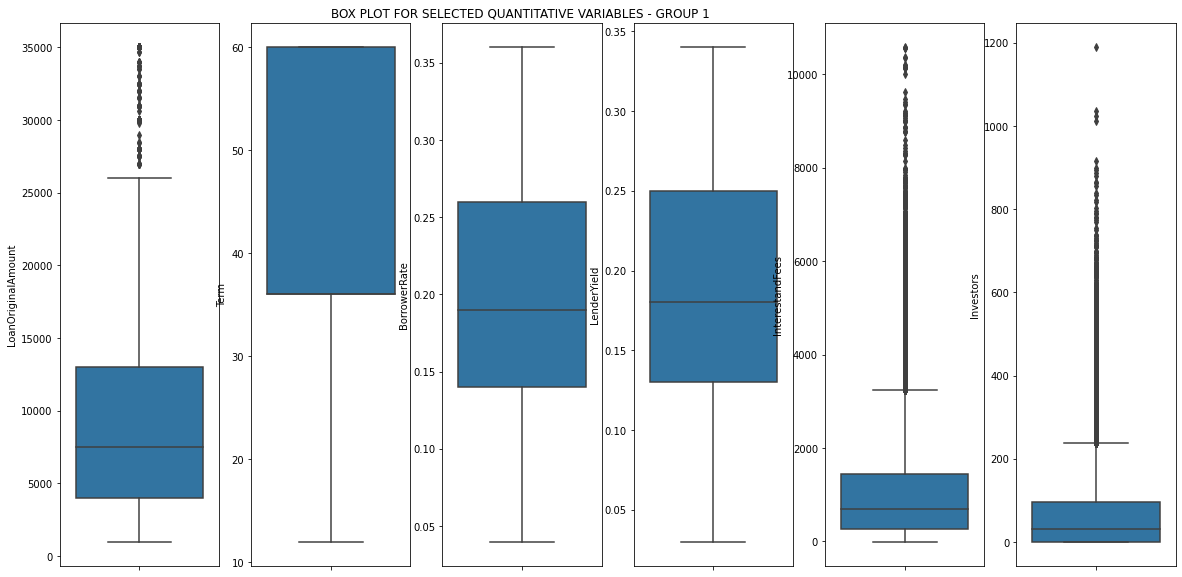

In [45]:
#Group 1 - Box Plot

#'LoanOriginalAmount', 'Term','BorrowerRate', 'LenderYield', 'InterestRateandFees', 'Investors'


plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]



plt.subplot(1, 6, 1)
sb.boxplot(data=ploanx, y='LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 2)
sb.boxplot(data=ploanx, y='Term', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 3)
sb.boxplot(data=ploanx, y='BorrowerRate', color = base_color)
plt.xticks(rotation = 45);

plt.title('BOX PLOT FOR SELECTED QUANTITATIVE VARIABLES - GROUP 1 ');

plt.subplot(1, 6, 4)
sb.boxplot(data=ploanx, y='LenderYield', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1,6, 5)
sb.boxplot(data=ploanx, y='InterestandFees', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 6)
sb.boxplot(data=ploanx, y='Investors', color = base_color)
plt.xticks(rotation = 45);


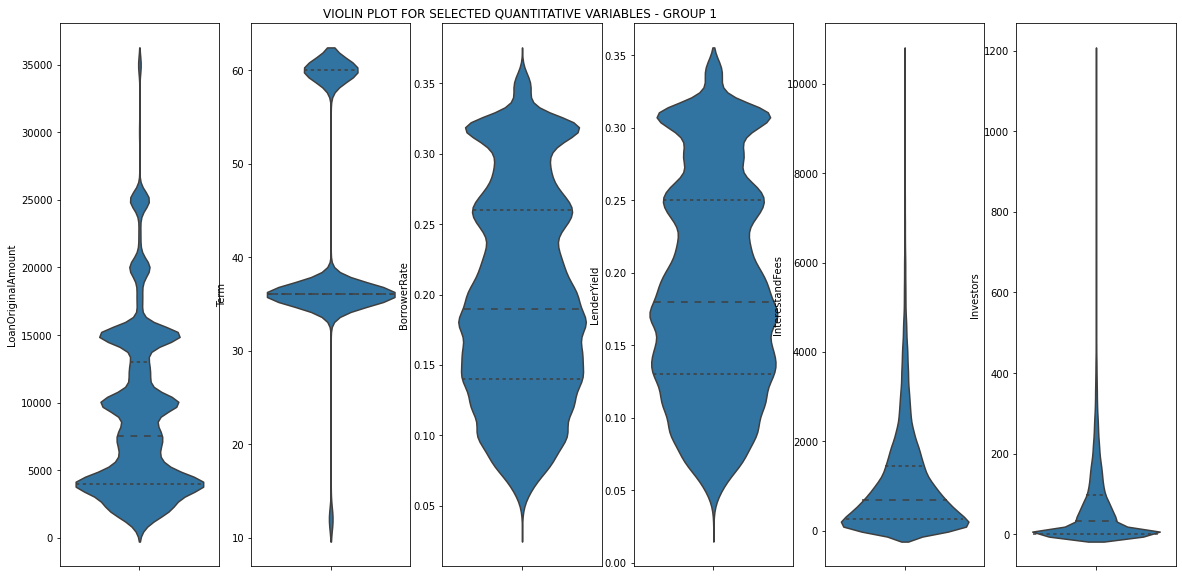

In [46]:
#Group 1 - Violin Plot

#'LoanOriginalAmount', 'Term','BorrowerRate', 'LenderYield', 'InterestRateandFees', 'Investors'

plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

plt.subplot(1, 6, 1)
sb.violinplot(data=ploanx, y='LoanOriginalAmount', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 2)
sb.violinplot(data=ploanx, y='Term', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 3)
sb.violinplot(data=ploanx, y='BorrowerRate', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.title('VIOLIN PLOT FOR SELECTED QUANTITATIVE VARIABLES - GROUP 1 ');

plt.subplot(1, 6, 4)
sb.violinplot(data=ploanx, y='LenderYield', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 5)
sb.violinplot(data=ploanx, y='InterestandFees', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 6)
sb.violinplot(data=ploanx, y='Investors', color = base_color, inner='quartile')
plt.xticks(rotation = 45);


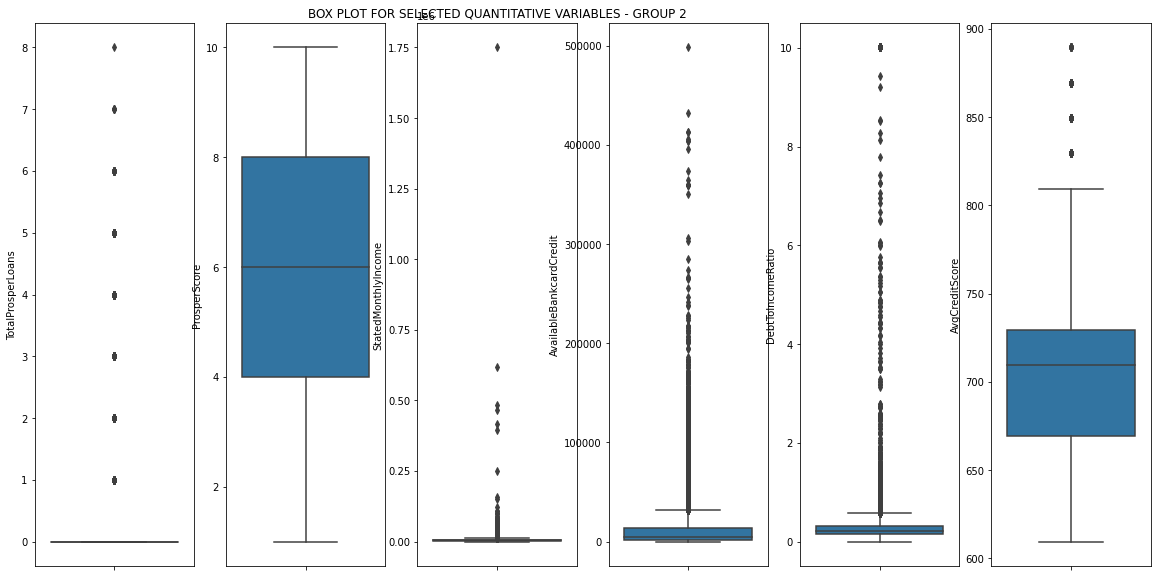

In [47]:
#Group 2 - Box Plot

#'TotalProsperLoans','ProsperScore', ,'StatedMonthlyIncome', 'AvailableBankcardCredit', 'DebtToIncomeRatio','AvgCreditScore'


plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

plt.subplot(1, 6, 1)
sb.boxplot(data=ploanx, y='TotalProsperLoans', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 2)
sb.boxplot(data=ploanx, y='ProsperScore', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 3)
sb.boxplot(data=ploanx, y='StatedMonthlyIncome', color = base_color)
plt.xticks(rotation = 45);

plt.title('BOX PLOT FOR SELECTED QUANTITATIVE VARIABLES - GROUP 2');

plt.subplot(1, 6, 4)
sb.boxplot(data=ploanx, y='AvailableBankcardCredit', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1,6, 5)
sb.boxplot(data=ploanx, y='DebtToIncomeRatio', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 6)
sb.boxplot(data=ploanx, y='AvgCreditScore', color = base_color)
plt.xticks(rotation = 45);

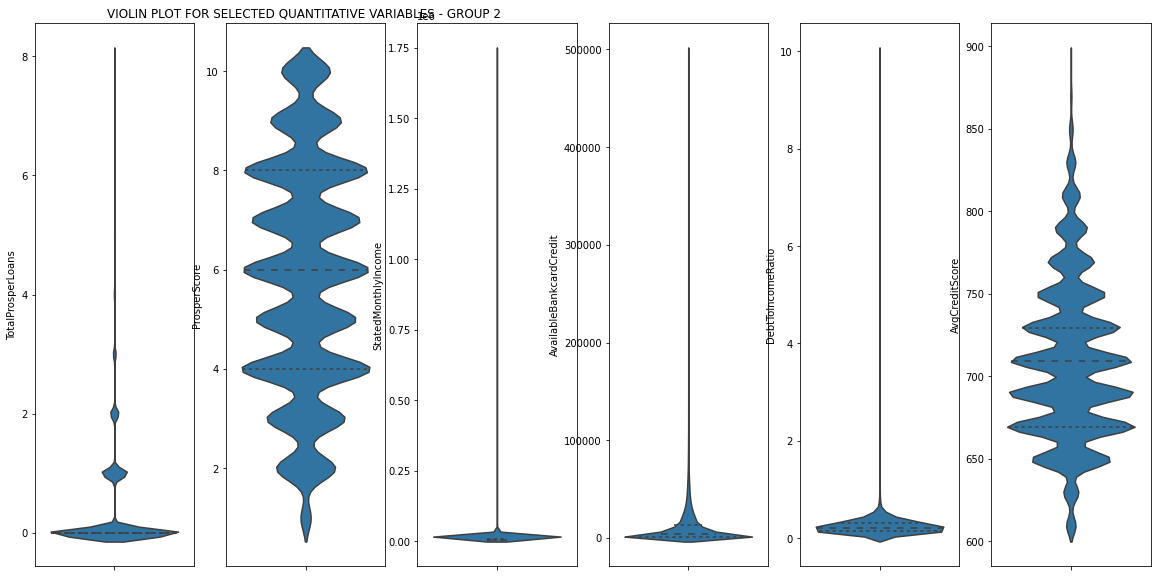

In [48]:
#Group 2 - Violin Plot

#'TotalProsperLoans','ProsperScore', ,'StatedMonthlyIncome', 'AvailableBankcardCredit', 'DebtToIncomeRatio','AvgCreditScore'

plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

plt.subplot(1, 6, 1)
sb.violinplot(data=ploanx, y='TotalProsperLoans', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 2)
sb.violinplot(data=ploanx, y='ProsperScore', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.title('VIOLIN PLOT FOR SELECTED QUANTITATIVE VARIABLES - GROUP 2 ');

plt.subplot(1, 6, 3)
sb.violinplot(data=ploanx, y='StatedMonthlyIncome', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 4)
sb.violinplot(data=ploanx, y='AvailableBankcardCredit', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 5)
sb.violinplot(data=ploanx, y='DebtToIncomeRatio', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

plt.subplot(1, 6, 6)
sb.violinplot(data=ploanx, y='AvgCreditScore', color = base_color, inner='quartile')
plt.xticks(rotation = 45);

In [49]:
# Define function to remove  Outliers by deleting records with any deviation  3 times the standard deviation

def rem_out(df,columns):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(3*sd))]
        
    return df

In [50]:
ploanx.shape

(83397, 20)

In [51]:
# Apply rem_out function to variables seen to have lots of outliers

ploanx = rem_out(ploanx, ['TotalProsperLoans'])
ploanx = rem_out(ploanx, ['LoanOriginalAmount'])
ploanx = rem_out(ploanx, ['InterestandFees'])
ploanx = rem_out(ploanx, ['Investors'])
ploanx = rem_out(ploanx, ['StatedMonthlyIncome'])
ploanx = rem_out(ploanx, ['AvailableBankcardCredit'])
ploanx = rem_out(ploanx, ['DebtToIncomeRatio'])
ploanx = rem_out(ploanx, ['AvgCreditScore'])
ploanx.shape

Working on column: TotalProsperLoans
Working on column: LoanOriginalAmount
Working on column: InterestandFees
Working on column: Investors
Working on column: StatedMonthlyIncome
Working on column: AvailableBankcardCredit
Working on column: DebtToIncomeRatio
Working on column: AvgCreditScore


(68943, 20)

> ##### Confirm our cleaning with box plots

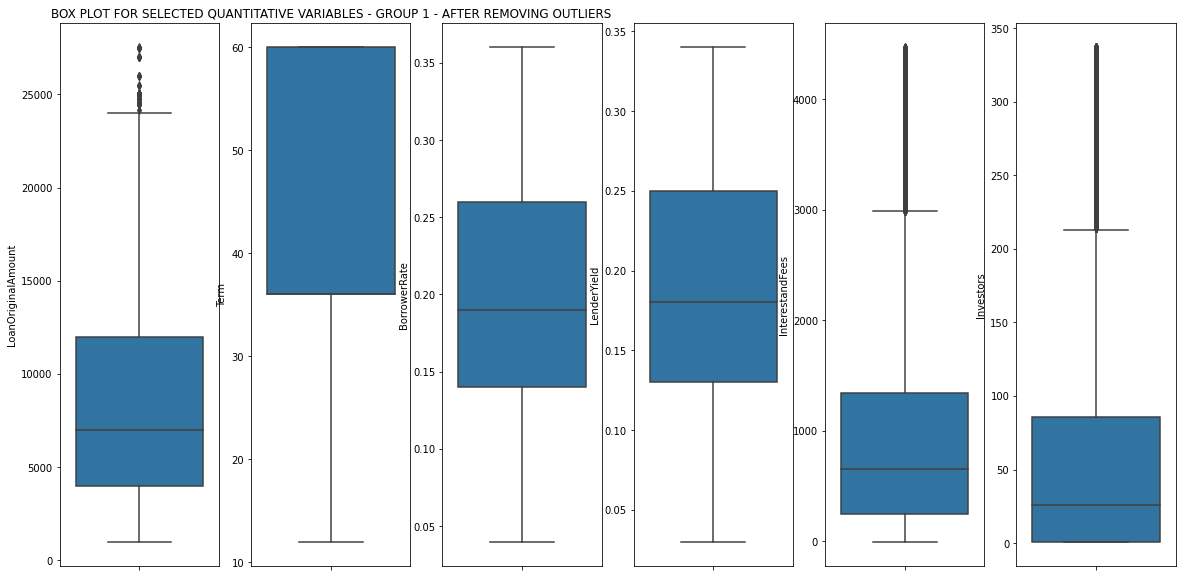

In [52]:
#Group 1 - Box Plot

#'LoanOriginalAmount', 'Term','BorrowerRate', 'LenderYield', 'InterestRateandFees', 'Investors'


plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

plt.subplot(1, 6, 1)
sb.boxplot(data=ploanx, y='LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 2)
sb.boxplot(data=ploanx, y='Term', color = base_color)
plt.xticks(rotation = 45);

plt.title('BOX PLOT FOR SELECTED QUANTITATIVE VARIABLES - GROUP 1 - AFTER REMOVING OUTLIERS');

plt.subplot(1, 6, 3)
sb.boxplot(data=ploanx, y='BorrowerRate', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 4)
sb.boxplot(data=ploanx, y='LenderYield', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1,6, 5)
sb.boxplot(data=ploanx, y='InterestandFees', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 6)
sb.boxplot(data=ploanx, y='Investors', color = base_color)
plt.xticks(rotation = 45);

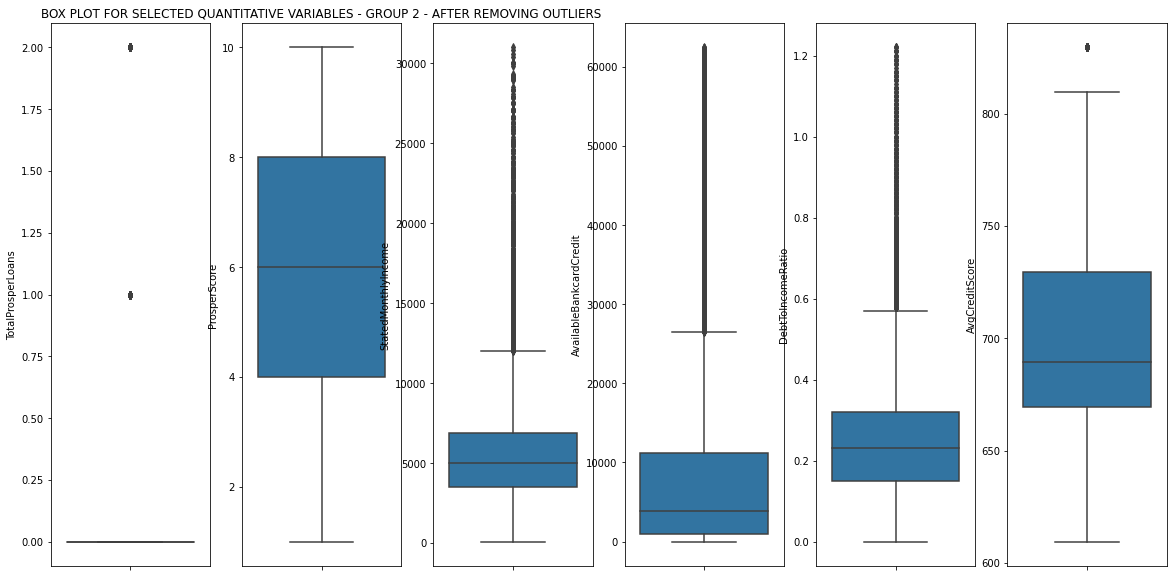

In [53]:
#Group 2 - Box Plot

#'TotalProsperLoans','ProsperScore', ,'StatedMonthlyIncome', 'AvailableBankcardCredit', 'DebtToIncomeRatio','AvgCreditScore'


plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

plt.subplot(1, 6, 1)
sb.boxplot(data=ploanx, y='TotalProsperLoans', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 2)
sb.boxplot(data=ploanx, y='ProsperScore', color = base_color)
plt.xticks(rotation = 45);

plt.title('BOX PLOT FOR SELECTED QUANTITATIVE VARIABLES - GROUP 2 - AFTER REMOVING OUTLIERS');

plt.subplot(1, 6, 3)
sb.boxplot(data=ploanx, y='StatedMonthlyIncome', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 4)
sb.boxplot(data=ploanx, y='AvailableBankcardCredit', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1,6, 5)
sb.boxplot(data=ploanx, y='DebtToIncomeRatio', color = base_color)
plt.xticks(rotation = 45);

plt.subplot(1, 6, 6)
sb.boxplot(data=ploanx, y='AvgCreditScore', color = base_color)
plt.xticks(rotation = 45);

In [54]:
ploanx.describe()

,LoanNumber,LoanOriginalAmount,Term,BorrowerRate,LenderYield,InterestandFees,TotalProsperLoans,ProsperScore,Investors,StatedMonthlyIncome,AvailableBankcardCredit,DebtToIncomeRatio,AvgCreditScore
count,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000,68943.000000
mean,87560.505708,8568.730836,42.432792,0.198719,0.188637,938.778187,0.256096,5.825131,56.695633,5623.724296,8484.880916,0.248396,704.100467
std,28690.765757,5706.589115,11.561909,0.072530,0.072529,918.404090,0.539421,2.242778,73.402541,3244.579791,11285.817741,0.133885,43.693979
min,38045.000000,1000.000000,12.000000,0.040000,0.030000,-2.350000,0.000000,1.000000,1.000000,85.170000,0.000000,0.000000,609.500000
25%,62123.500000,4000.000000,36.000000,0.140000,0.130000,251.120000,0.000000,4.000000,1.000000,3477.710000,979.000000,0.150000,669.500000
50%,89415.000000,7000.000000,36.000000,0.190000,0.180000,653.240000,0.000000,6.000000,26.000000,4998.330000,3885.000000,0.230000,689.500000
75%,109473.500000,12000.000000,60.000000,0.260000,0.250000,1346.845000,0.000000,8.000000,86.000000,6896.920000,11204.000000,0.320000,729.500000
max,136486.000000,27518.000000,60.000000,0.360000,0.340000,4470.350000,2.000000,10.000000,337.000000,31000.000000,62450.000000,1.220000,829.500000


In [55]:
ploanx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68943 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LoanNumber               68943 non-null  int64   
 1   ListingCategory          68943 non-null  category
 2   LoanStatus               68943 non-null  category
 3   LoanOriginalAmount       68943 non-null  float64 
 4   Term                     68943 non-null  int64   
 5   BorrowerRate             68943 non-null  float64 
 6   LenderYield              68943 non-null  float64 
 7   InterestandFees          68943 non-null  float64 
 8   TotalProsperLoans        68943 non-null  int64   
 9   ProsperScore             68943 non-null  int64   
 10  Investors                68943 non-null  int64   
 11  StatedMonthlyIncome      68943 non-null  float64 
 12  IncomeVerifiable         68943 non-null  bool    
 13  AvailableBankcardCredit  68943 non-null  float64 
 14  DebtT

---------

### What is the structure of your dataset?

> There are 68943 records with 19  variables of interest to be used in this exploration as shown in the info above after initial data wrangling and cleaning.

> The variables are in two categories numerical and categotical:


>> num_vars = ['LoanOriginalAmount', 'Term','BorrowerRate', 'LenderYield', 'InterestandFees','TotalProsperLoans', 'ProsperScore', 'Investors', 'StatedMonthlyIncome','AvailableBankcardCredit', 'DebtToIncomeRatio', 'AvgCreditScore']


>> cat_vars = ['ListingCategory', 'LoanStatus',  'CreditGrade', 'Occupation', 'IsBorrowerHomeowner', 'BorrowerState']

> CreditGrading is ordered with the order from highest to lowest being : AA, A, B, C, D, E, HR, NC.

> Prosper Score is also ordered from 1 to 10 with 10 being highest.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in factors to determine the possible status of issued loans?

> Does credit rating affect loans interest rate?

> Does income affect the amount of Loans to be given?

> Does term affect interest rate?

> Does higher interest rate results in higher yield?

> Which states go for most loans?

> Which category of employees go for loans and which category defaults in payment?

> What do most people go for loans for? 

> Does being a homeowner gives less interest or higher loan amount

> Relationship between investors and loan amount given.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Key features are: Loan status, Interest rate, Loan Original Amount, credit Ratings. 

> All others will also be used to support the analysis. 

 


## Univariate Exploration


### Visualisation of some main variables of interest

> ### LoanStatus

>> What percentage of Proper Loans gets defaulted or past due?

<Figure size 1440x360 with 0 Axes>

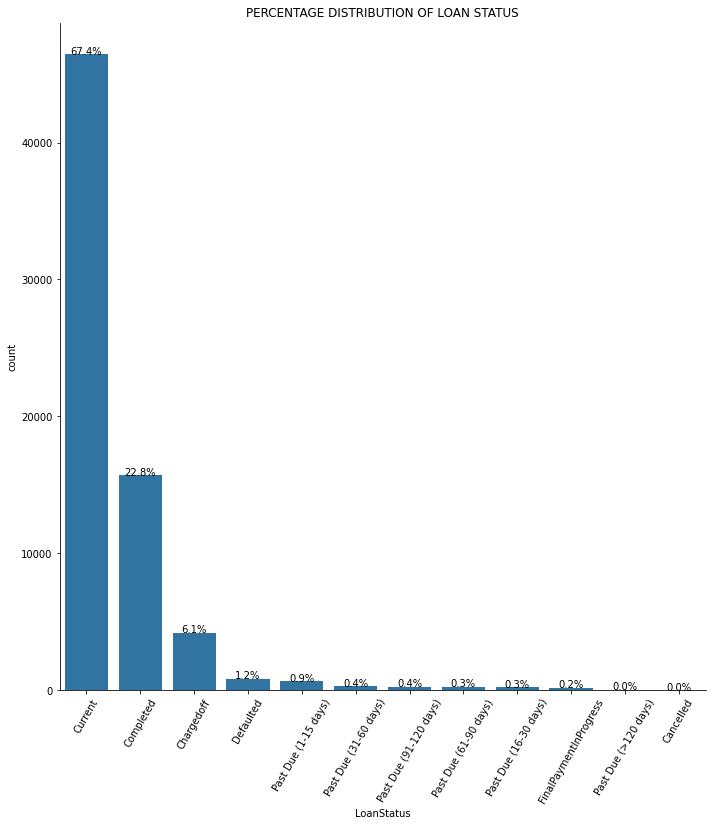

In [56]:
st_order = ploanx['LoanStatus'].value_counts().index
plt.figure(figsize = (20,5));

sb.catplot(data=ploanx, x='LoanStatus', color=base_color, kind='count', height=10, order=st_order);

st_count = ploanx['LoanStatus'].value_counts()
loan_tot = ploanx['LoanStatus'].value_counts().sum()
plt.title('PERCENTAGE DISTRIBUTION OF LOAN STATUS')

locs, labels = plt.xticks(rotation=60);

for loc, label in zip(locs, labels):
    count = st_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loan_tot);

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');

> #### Obesrvations on Loan Status 

>> It was observed that majority of loans thus 67.4% with Prosper Loans are still running, with 22.8% completed and 6.1% chargd off. Only a total of 3.7% of the loans were defaulted or past due. 

>> It will still be relevant to assess the relations with other variables on loan defaulting.

> ### Listing Category

>> What category of Prosper Loans are mosted listed by borrowers?

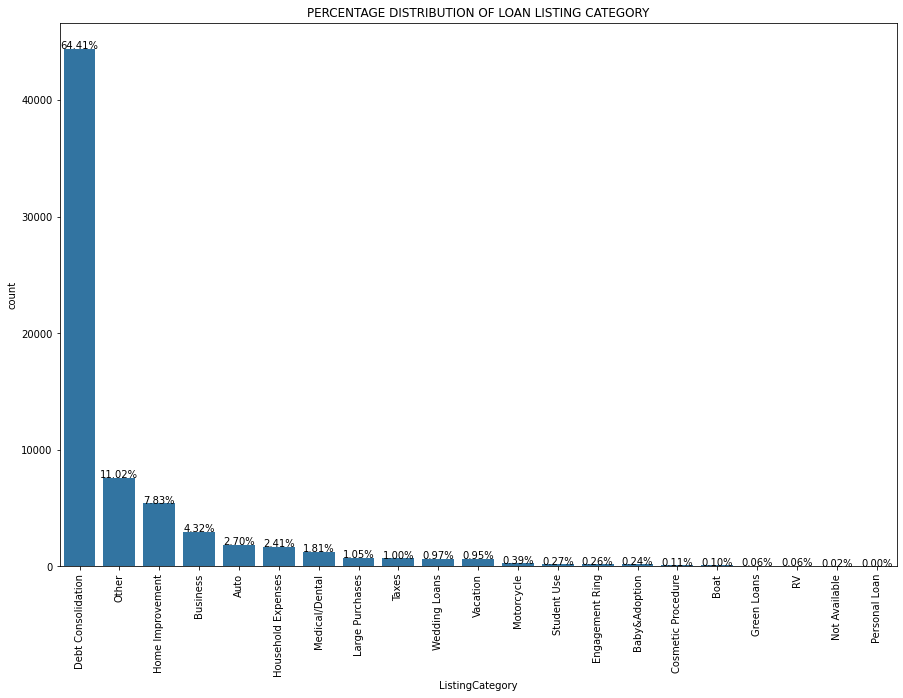

In [57]:
lc_order = ploanx['ListingCategory'].value_counts().index
plt.figure(figsize = (15,10))
sb.countplot(data=ploanx, x='ListingCategory', color=base_color, order=lc_order);


cat_counts = ploanx['ListingCategory'].value_counts()
ploanx_tot= ploanx['ListingCategory'].value_counts().sum()

plt.title('PERCENTAGE DISTRIBUTION OF LOAN LISTING CATEGORY')

locs, labels = plt.xticks(rotation=90) 

for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/ploanx_tot)


    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', fontsize=10)

> #### Obesrvations on Listing Category

>> It was observed that majority of loans thus 64.41% was for debt consolidation. It was observed that 0 was for personal loans. Most less listed loans were purposely for leisure and vacation thus segment of all loans under 1%.

>> It will still be relevant to assess which listing category gets dafaulted the most...

> ### Credit Grading

>> Which Credit Grades are mostly offered loans; higher or lower?

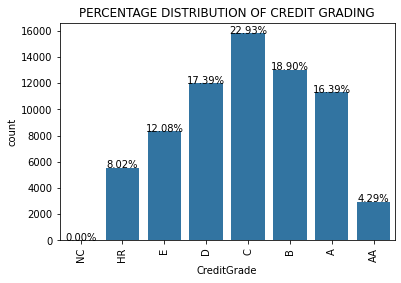

In [58]:
sb.countplot(data=ploanx, x='CreditGrade', color=base_color);

cred_counts = ploanx['CreditGrade'].value_counts()

locs, labels = plt.xticks(rotation=90) 

plt.title('PERCENTAGE DISTRIBUTION OF CREDIT GRADING')

for loc, label in zip(locs, labels):
    count = cred_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/ploanx_tot)


    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', fontsize=10)

> #### Obervation

>> It is observed that most Prosper Loans falls within average ratings of C. Also loans are not issued to persons with 0 credits thus No Credit(NC).

> ### Occupation

>> Which kind of workers has most Prosper Loans?

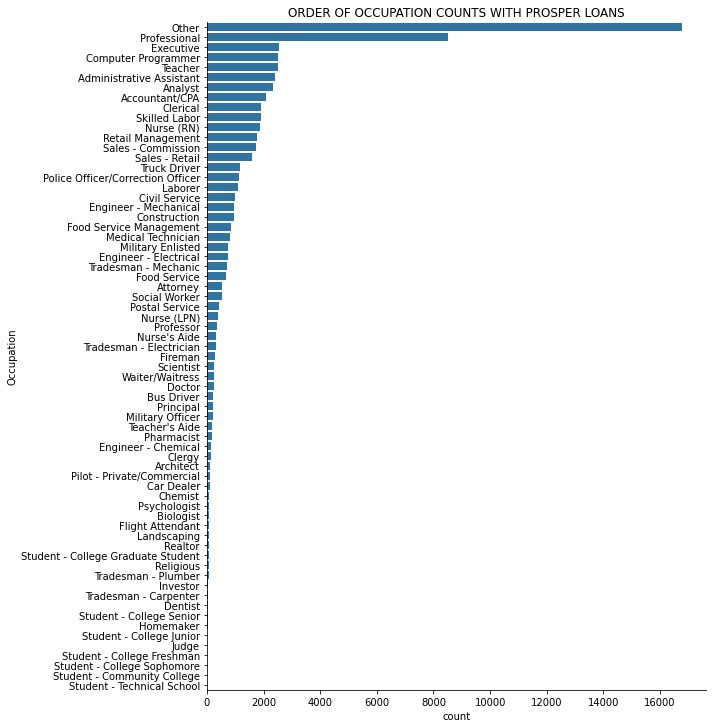

In [59]:
empstat_order = ploanx['Occupation'].value_counts().index

sb.catplot(data=ploanx, y='Occupation', color=base_color, kind='count', height=10, order=empstat_order );
plt.title('ORDER OF OCCUPATION COUNTS WITH PROSPER LOANS');

> #### Observations

>> Observed that students are rarely given loans. Most Prosper Loans were issued to Professionls, Executive and Computer programmers.

>> Which occupation category defaults loans payments the most is an area of further analysis?

> ### IsBorrowerHomeOwner

>> How many of Borrowers have mortages?

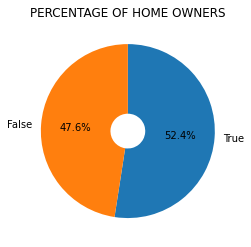

In [60]:
homex = ploanx.IsBorrowerHomeowner.value_counts()
plt.pie(homex, labels = homex.index,  autopct='%1.1f%%', startangle = 90, counterclock=False, wedgeprops = {'width' : 0.8});
plt.title('PERCENTAGE OF HOME OWNERS');

> #### Observations
>> Prosper Loans Borrowers are fairly split between homeowners and non-homeowners.

>> Which pf these categories gets higher loan amounts?

> ### Borrower State

>> Which States has most loans?

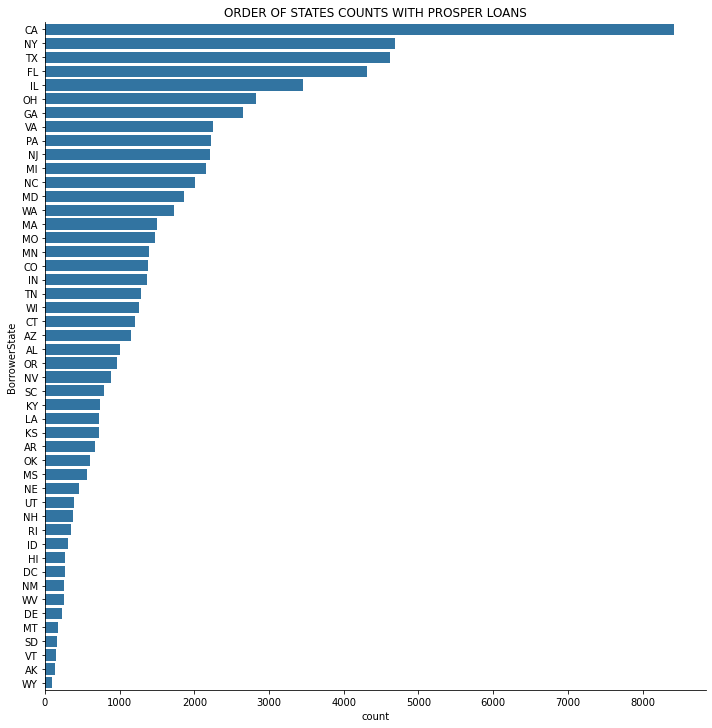

In [61]:
empstat_order = ploanx['BorrowerState'].value_counts().index

sb.catplot(data=ploanx, y='BorrowerState', color=base_color, kind='count', height=10, order=empstat_order );
plt.title('ORDER OF STATES COUNTS WITH PROSPER LOANS');


> #### Observations.

>> Most states with loans are from Carlifonia, New York and Texas.

>> Which  states defaults most loan payments?

> ### LoanOrginalAmount

In [62]:
#Looking at Available Bank Credit
ploanx.LoanOriginalAmount.describe()

count    68943.000000
mean      8568.730836
std       5706.589115
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12000.000000
max      27518.000000
Name: LoanOriginalAmount, dtype: float64

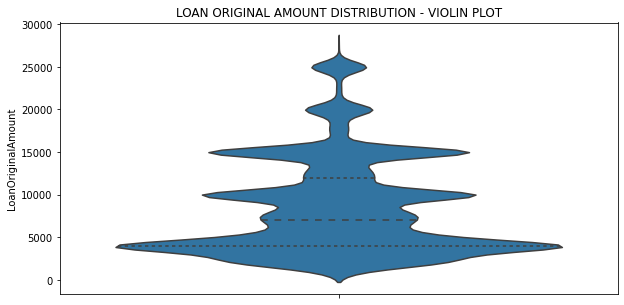

In [63]:
plt.figure(figsize = (10,5))
sb.violinplot(data=ploanx, y='LoanOriginalAmount', color = base_color, inner='quartile')
plt.xticks(rotation = 45);
plt.title('LOAN ORIGINAL AMOUNT DISTRIBUTION - VIOLIN PLOT');

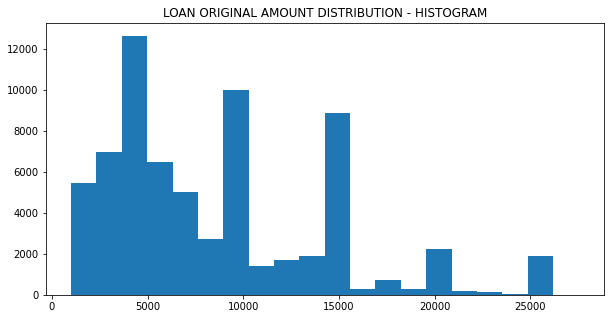

In [64]:
plt.figure(figsize = (10,5))
plt.hist(data = ploanx, x = 'LoanOriginalAmount', bins=20);
plt.title('rotation = 45');
plt.title('LOAN ORIGINAL AMOUNT DISTRIBUTION - HISTOGRAM');

> #### Observations

> More smaller loans amount are given than higher loan amounts in the range of 5000-15000.

> It is also observed that most loans are given in the multiples of 5000. 

>> What Facors determine the amount of original loan given?

> #### Term

In [65]:
termx = ploanx.Term.value_counts()

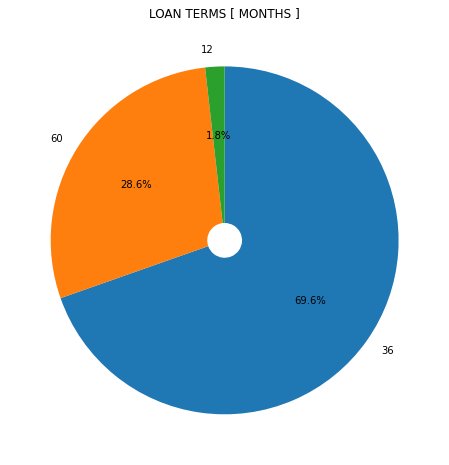

In [66]:
plt.figure(figsize = (12,8))
plt.pie(termx, labels = termx.index,  autopct='%1.1f%%', startangle = 90, counterclock=False, wedgeprops = {'width' : 0.9});
plt.title('LOAN TERMS [ MONTHS ]');

> #### Observations

> Most of prosper loans given were for 36 months, then 60 months and lastly 12 months. Implies that Lenders prefer medium term loans to short tern or long term.

> Does term affect interest rate, yield  and original loan amount given?


> ### BorrowerRate

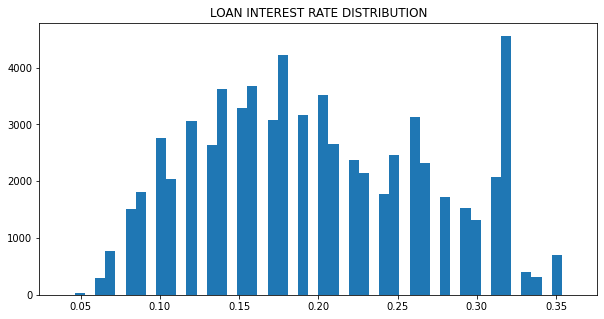

In [67]:
plt.figure(figsize = (10,5))
plt.hist(data = ploanx, x = 'BorrowerRate', bins=50);
plt.title('LOAN INTEREST RATE DISTRIBUTION');

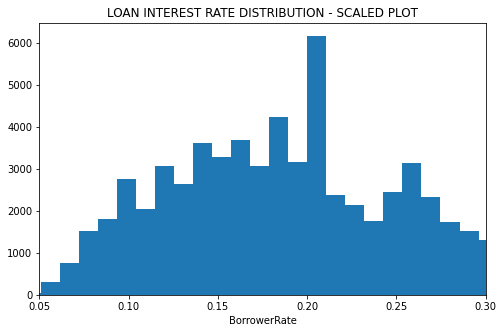

In [68]:
plt.figure(figsize=[8, 5])
plt.hist(data = ploanx, x = 'BorrowerRate', bins=30);
plt.xlim([0.05,.30])
plt.xlabel('BorrowerRate');
plt.title('LOAN INTEREST RATE DISTRIBUTION - SCALED PLOT');
plt.show()


> #### Observation

>>  Borrower rate  has a bi-modal distribution. 

>>  It is necessary to investigate the variable causing this.

> ### Lender Yield

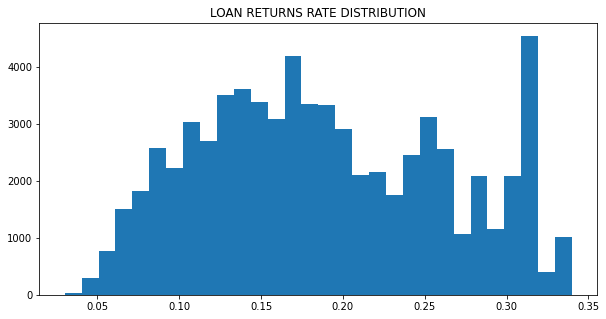

In [69]:
plt.figure(figsize = (10,5))
plt.hist(data = ploanx, x = 'LenderYield', bins = 30);
plt.title('LOAN RETURNS RATE DISTRIBUTION');

> #### Observation

>>  Lender Yield has  rate  has a multi-modal distribution.  It is necessary to investigate the variable causing this. Could it be from IsBorrowerHomeowner??

>>  Does high borrower rate translate to high yield and does high loan amount translate to high yiled.

> ### Interest and Fees

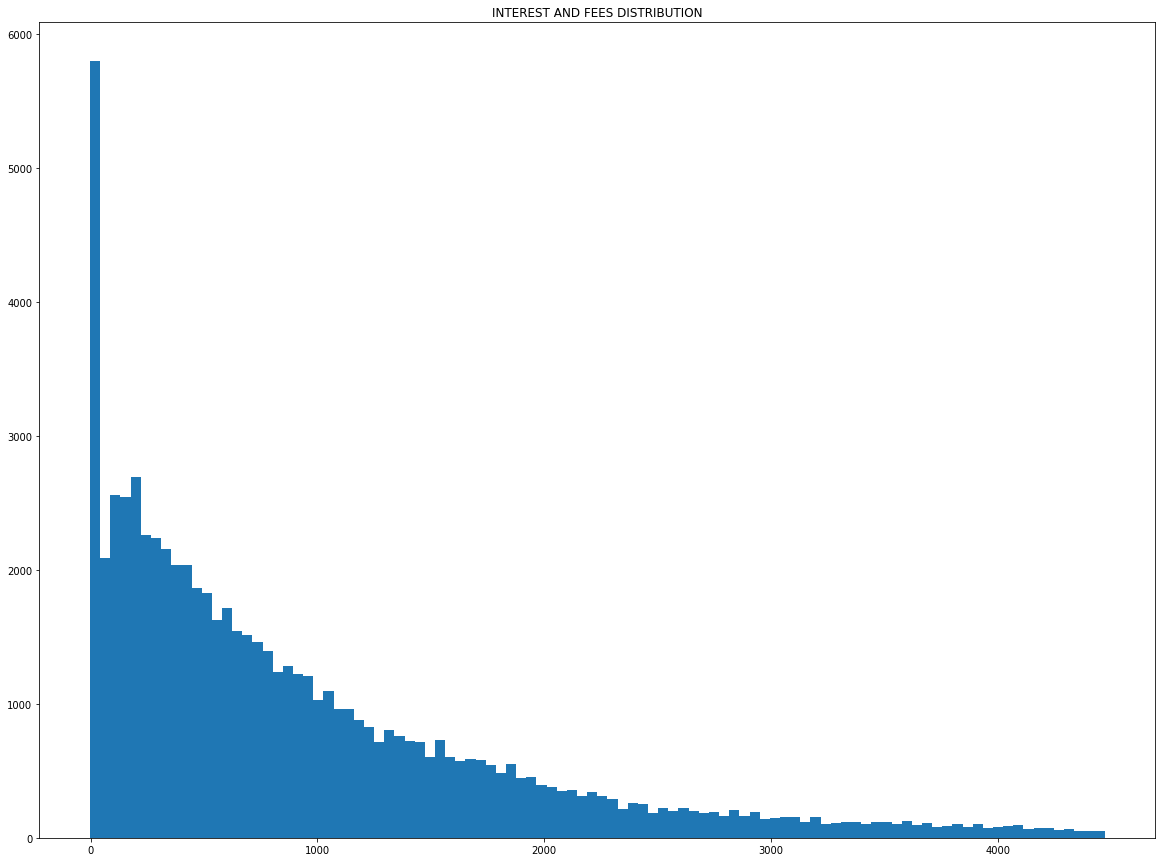

In [70]:
plt.figure(figsize = (20,15))
plt.hist(data = ploanx, x = 'InterestandFees', bins=100);
plt.title('INTEREST AND FEES DISTRIBUTION');

> #### Obervations

>> The distribution is right skewed.

>> Does higher borrower rate tends to increase fees or higher loan amount?

> ### Total prosper loans

In [71]:
loan_count = ploanx.TotalProsperLoans.value_counts()

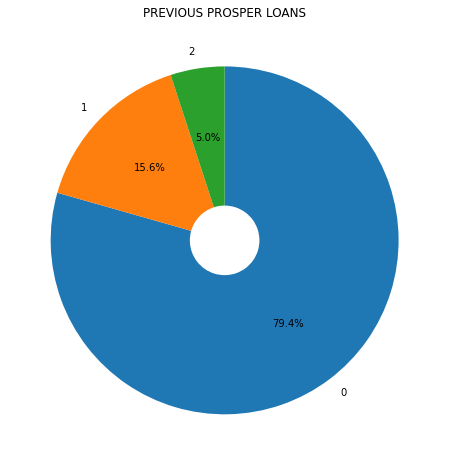

In [72]:
plt.figure(figsize = (12,8))
plt.pie(loan_count, labels = loan_count.index,  autopct='%1.1f%%', startangle = 90, counterclock=False, wedgeprops = {'width' : 0.8});
plt.title('PREVIOUS PROSPER LOANS');

> ### Observations
>> About 80% had no previous prior loans. Likely persons with prior loans are not given new loans.

>> Does persons with previous prosper loans gets higher loan amounts. 

>> Which category of employees has higher number of prosper loans.

> ### Prosper Score

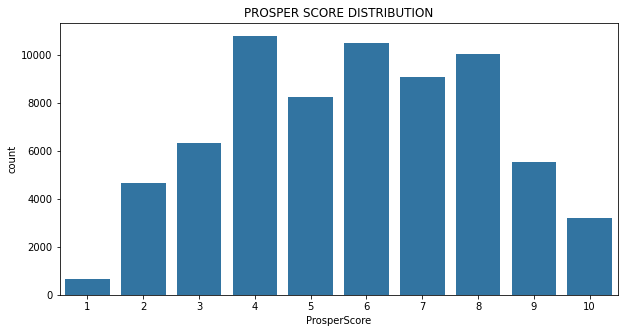

In [73]:
plt.figure(figsize = (10,5))
sb.countplot(data=ploanx, x='ProsperScore', color=base_color);
plt.title('PROSPER SCORE DISTRIBUTION');

> ### Observations

>> Average prosper scores have most loans. Applicable beacause most people can have a perfect score of 10. Even most risk persons were given loans.

>> What stands out with thos with highest risk being given loans.

>> Is there any correlation for Prosper Score with other variables?

> ### Investors

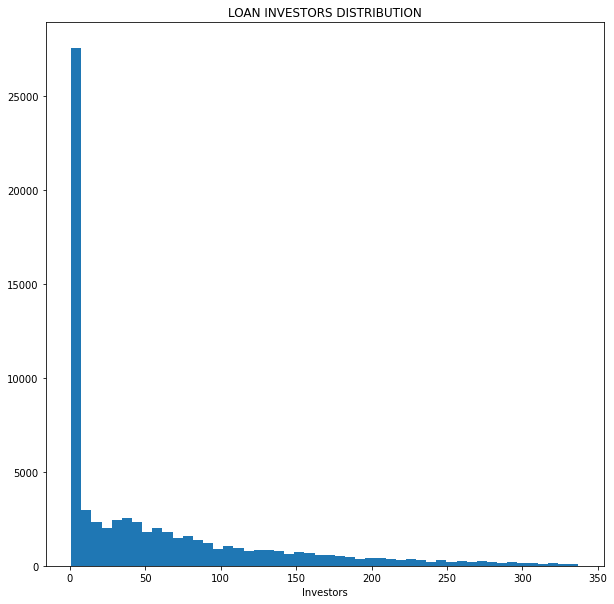

In [74]:
plt.figure(figsize=[10, 10])
plt.hist(data = ploanx, x = 'Investors', bins=50);
plt.xlabel('Investors');
plt.title('LOAN INVESTORS DISTRIBUTION');
plt.show()

In [75]:
ploanx.Investors.value_counts().head()

1    23610
2     1087
3      775
4      613
8      531
Name: Investors, dtype: int64

In [76]:
ploanx.Investors.value_counts().tail()

328    13
337    13
336    11
331    10
318     8
Name: Investors, dtype: int64

In [77]:
# Exlcude single investors in the plot

invest = ploanx[ploanx.Investors != 1]

invest.Investors.value_counts().sum()

45333

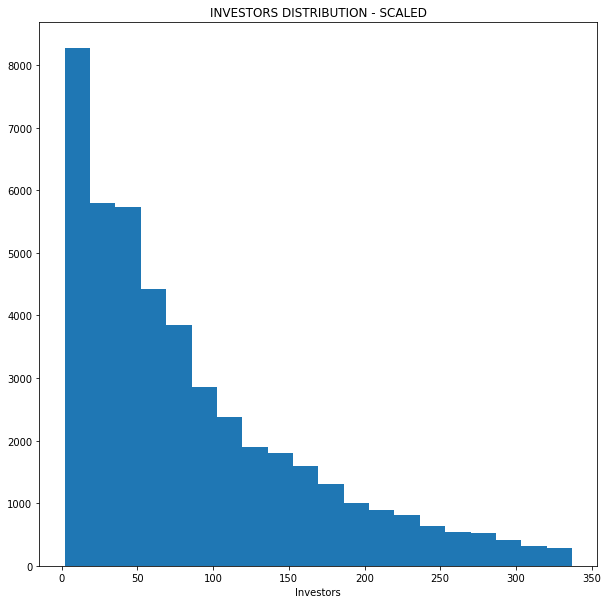

In [78]:
plt.figure(figsize=[10, 10])
plt.hist(data = invest, x = 'Investors', bins=20);
plt.xlabel('Investors');
plt.title('INVESTORS DISTRIBUTION - SCALED');
plt.show()

> #### Observations
> The distribution is skewed to the right. The number of listings financed by single indivuals is approximately half to those financed by groups of 2 to 318.

> Does the number of investors affect the loan amount?

> ### Stated Monthly Income

In [79]:
ploanx.StatedMonthlyIncome.describe()

count    68943.000000
mean      5623.724296
std       3244.579791
min         85.170000
25%       3477.710000
50%       4998.330000
75%       6896.920000
max      31000.000000
Name: StatedMonthlyIncome, dtype: float64

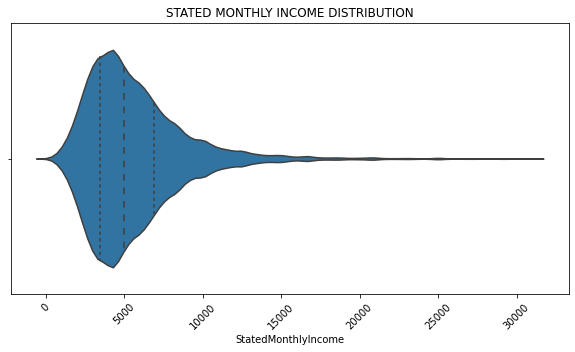

In [80]:
plt.figure(figsize = (10,5))
sb.violinplot(data=ploanx, x='StatedMonthlyIncome', color = base_color, inner='quartile')
plt.xticks(rotation = 45);
plt.title('STATED MONTHLY INCOME DISTRIBUTION');

> ### Observations

>> Stated Monthly Income is right skewed with a mean of 5623 with most records in the 3rd quartile.  

>> Analyse the relationship between income and loan amount given

> ### AvailableBankcardCredit

In [81]:
ploanx.AvailableBankcardCredit.describe()

count    68943.000000
mean      8484.880916
std      11285.817741
min          0.000000
25%        979.000000
50%       3885.000000
75%      11204.000000
max      62450.000000
Name: AvailableBankcardCredit, dtype: float64

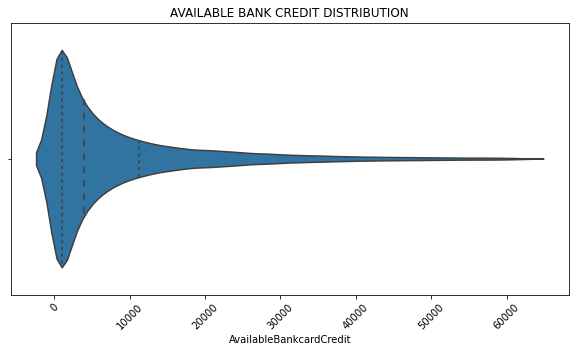

In [82]:
plt.figure(figsize = (10,5))
sb.violinplot(data=ploanx, x='AvailableBankcardCredit', color = base_color, inner='quartile')
plt.xticks(rotation = 45);
plt.title('AVAILABLE BANK CREDIT DISTRIBUTION');

> ### Observations

>> Available Bank Credit is right skewed with a mean of 3244 with most of the records in the 3rd quartile. 

>> Analyse the relationship between bank credit  and loan amount given 

> ### DebtToIncomeRatio

In [83]:
ploanx.DebtToIncomeRatio.describe()

count    68943.000000
mean         0.248396
std          0.133885
min          0.000000
25%          0.150000
50%          0.230000
75%          0.320000
max          1.220000
Name: DebtToIncomeRatio, dtype: float64

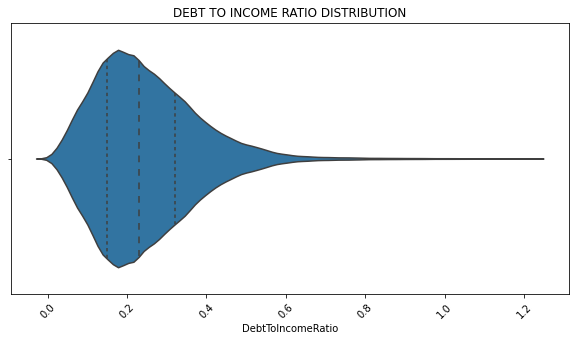

In [84]:
plt.figure(figsize = (10,5))
sb.violinplot(data=ploanx, x='DebtToIncomeRatio', color = base_color, inner='quartile')
plt.xticks(rotation = 45);
plt.title('DEBT TO INCOME RATIO DISTRIBUTION');

> ### Observations

>> Debt to income ratio  is right skewed with a mean of 0.24. 

>> Relationship of DebtToIncomeRation and Loan status? 

> ### AvgCreditScore

In [85]:
ploanx.AvgCreditScore.describe()

count    68943.000000
mean       704.100467
std         43.693979
min        609.500000
25%        669.500000
50%        689.500000
75%        729.500000
max        829.500000
Name: AvgCreditScore, dtype: float64

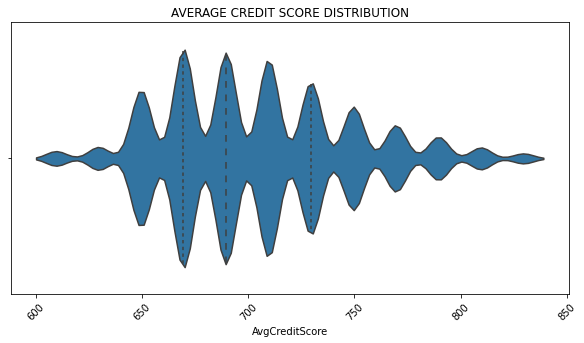

In [86]:
plt.figure(figsize = (10,5))
sb.violinplot(data=ploanx, x='AvgCreditScore', color = base_color, inner='quartile')
plt.xticks(rotation = 45);
plt.title('AVERAGE CREDIT SCORE DISTRIBUTION');

> AvgCredit Score has a normal distribution. 

> Does credit score  have positive relation with prosper score and credit grading?

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Lot of ouliers were identified in TotalProsperLoans, LoanOriginalAmount, InterestandFees, StatedMonthlyIncome, AvailableBankcardCredit, DebtToIncomeRatio, AvgCreditScore  hence were cleaned. 



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Prosper Rating (AlphaNumeric) column to  was merged to Credit Grade.

> Some data types were changed for example Prosper score was changed from float to int.



## Bivariate Exploration
> #### To start off with, I want to look at the pairwise correlations present between features in the data.

In [87]:
num_vars = ['LoanOriginalAmount','Term','BorrowerRate', 'LenderYield', 'InterestandFees','TotalProsperLoans', 'ProsperScore', 'Investors', 'StatedMonthlyIncome','AvailableBankcardCredit', 'DebtToIncomeRatio', 'AvgCreditScore']
cat_vars = ['ListingCategory', 'LoanStatus',  'CreditGrade', 'Occupation', 'IsBorrowerHomeowner', 'CreditGrade', 'BorrowerState']

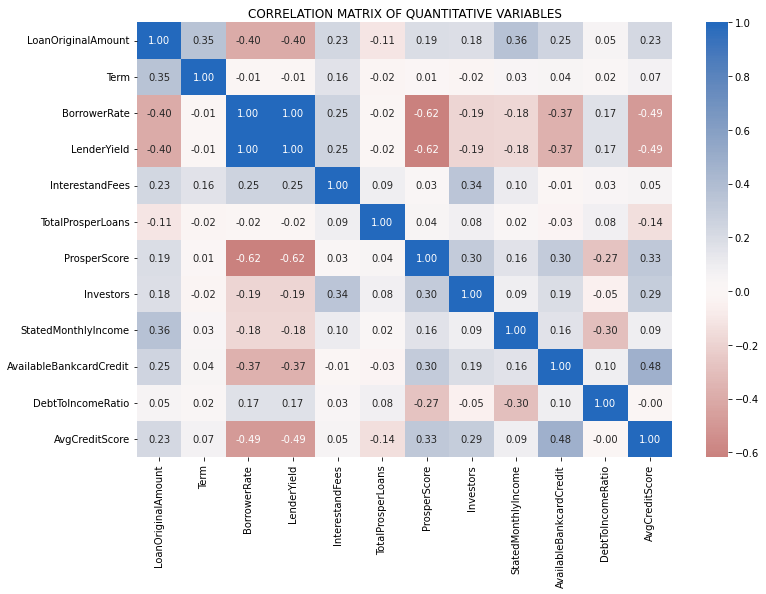

In [88]:
# correlation plot
plt.figure(figsize = [12, 8]);
sb.heatmap(ploanx[num_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0 );
plt.title('CORRELATION MATRIX OF QUANTITATIVE VARIABLES');
plt.show();

> #### Observation:  The following are observations of interest based on earlier questions.

1. Borrower Rate and Lender Yield are highly correlated.

2. Both BorrowerRate and LenderYield are inversely correlated with Prosper Score.

3. Income has a correlation with Loan amount but not very strong. 

4. No relation between term vs  interest rate/yield. Only correlation for Term is LoanOrginal amount.

5. There is a positive relation betwwen loan amount and lender yield. Bigger loans translates to bigger yields.

6. There is a positive but weak relation between loan amount and number of investors.

7. There is a negative but weak correlation but loan amount and number of total number of previous loans.

8. There is also a positive correlation between yield and loan amount given and so with interest rate. 

9. Prosper Score has a postive correlation with Investors, BankCredit, Avg Credit and inverse relation to debt to income Ratio.

> ####  Observations

1. Most defaulted Loans have higher interest rates. 

2. Most defaulted Loans were mostly by Borrowers with lower stated Monthly income.


3. Positive correlation between credit grading and prosper score and both with an inverse relationship with interest rate.


4. Homeowners averagely have a good credit rating than no homeowners and also lesser interest rates.

5. Homeowners also get higher loan amounts than no home owners.

In [89]:
pip install seaborn --upgrade

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


> #### Looking at the relationship between some numerical variables and the categorical variables

<Figure size 576x576 with 0 Axes>

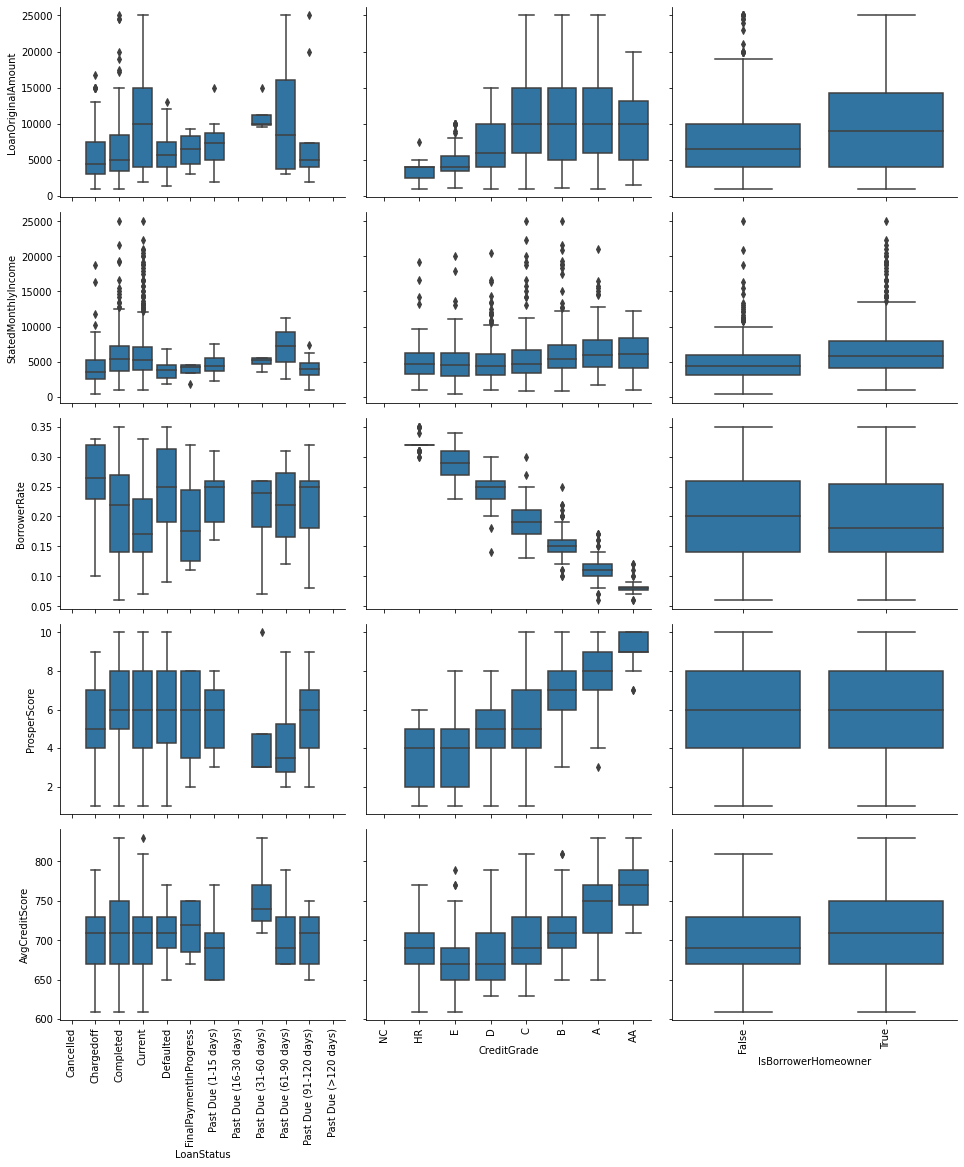

In [90]:
ploanx_samp = ploanx.sample(n=1000, replace = False)

num1 = ['LoanOriginalAmount', 'StatedMonthlyIncome','BorrowerRate', 'ProsperScore', 'AvgCreditScore']
cat1 = ['LoanStatus', 'CreditGrade','IsBorrowerHomeowner']

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color);
    plt.xticks(rotation=90);

plt.figure(figsize = [8,8]);
g = sb.PairGrid(data = ploanx_samp, y_vars = num1 , x_vars = cat1, height = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

<Figure size 1152x576 with 0 Axes>

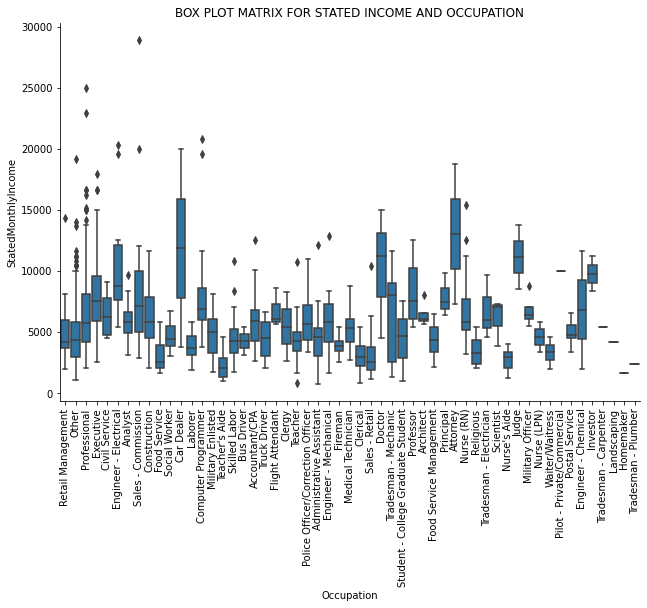

In [93]:
ploanx_samp = ploanx.sample(n=1000, replace = False)

num1 = ['StatedMonthlyIncome']
cat2 = ['Occupation']

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color);
    plt.xticks(rotation=90);

plt.figure(figsize = [16,8]);
g = sb.PairGrid(data = ploanx_samp, y_vars = num1 , x_vars = cat2, height = 6, aspect = 1.5);
g.map(boxgrid);
plt.title('BOX PLOT MATRIX FOR STATED INCOME AND OCCUPATION');
plt.show();

> #### Observations 

>> Occupation with highest income are Executive, Sales Commission, proffesors.

> ### Comparing the categorical variables

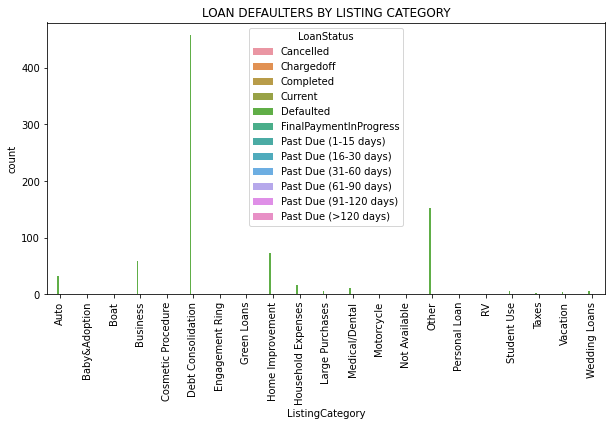

In [94]:
plt.figure(figsize = [10, 5])

loan_default = ploanx[ploanx.LoanStatus == 'Defaulted']
sb.countplot(data = loan_default, x = 'ListingCategory', hue = 'LoanStatus');
plt.xticks(rotation=90);
plt.title('LOAN DEFAULTERS BY LISTING CATEGORY');

> #### Observations 

>> Amongst the few deafulting loans, Debt Consolidation, Home Improvement, Business and Auto are the most defaulting.

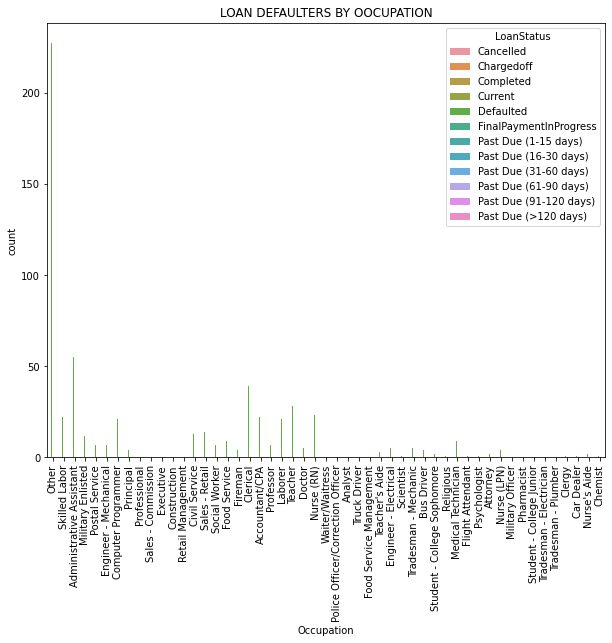

In [95]:
plt.figure(figsize = [10, 8])

loan_default = ploanx[ploanx.LoanStatus == 'Defaulted']
sb.countplot(data = loan_default, x = 'Occupation', hue = 'LoanStatus');
plt.xticks(rotation=90);
plt.title('LOAN DEFAULTERS BY OOCUPATION');

> #### Observations 

>> Amongst the few deafulting loans, profesionals, Admin asistants, Clericals are most defaulters. 

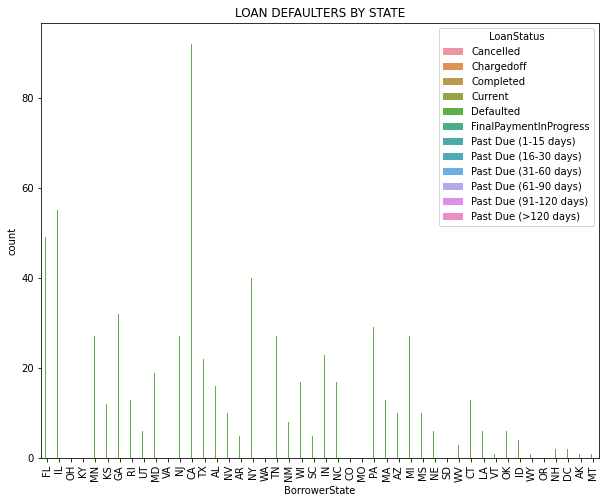

In [96]:
plt.figure(figsize = [10, 8])

loan_default = ploanx[ploanx.LoanStatus == 'Defaulted']
sb.countplot(data = loan_default, x = 'BorrowerState', hue = 'LoanStatus');
plt.xticks(rotation=90);
plt.title('LOAN DEFAULTERS BY STATE');

> #### Observations 

>> Amongst the few deafulting loans, people from CA default the most

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


Borrower Rate and Lender Yield are highly correlated.

Both BorrowerRate and LenderYield are inversely correlated with Prosper Score.

Income has a correlation with Loan amount but not very strong. 

No relation between term vs  interest rate/yield. Only correlation for Term is LoanOrginal amount.

There is a positive relation betwwen loan amount and lender yield. Bigger loans translates to bigger yields.

There is a positive but weak relation between loan amount and number of investors.

There is a negative but weak correlation but loan amount and number of total number of previous loans.

There is also a positive correlation between yield and loan amount given and so with interest rate. 

Prosper Score has a postive correlation with Investors, BankCredit, Avg Credit and inverse relation to debt 

Most defaulted Loans have higher interest rates. 

Most defaulted Loans were mostly by Borrowers with lower stated Monthly income.

Positive correlation between credit grading and prosper score and both with an inverse relationship with interest rate.


Amongst the few deafulting loans, people from CA default the most

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Occupation with highest income are Executive, Sales Commission, proffesors.

Homeowners averagely have a good credit rating than no homeowners and also lesser interest rates.

Homeowners also get higher loan amounts than no home owners.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

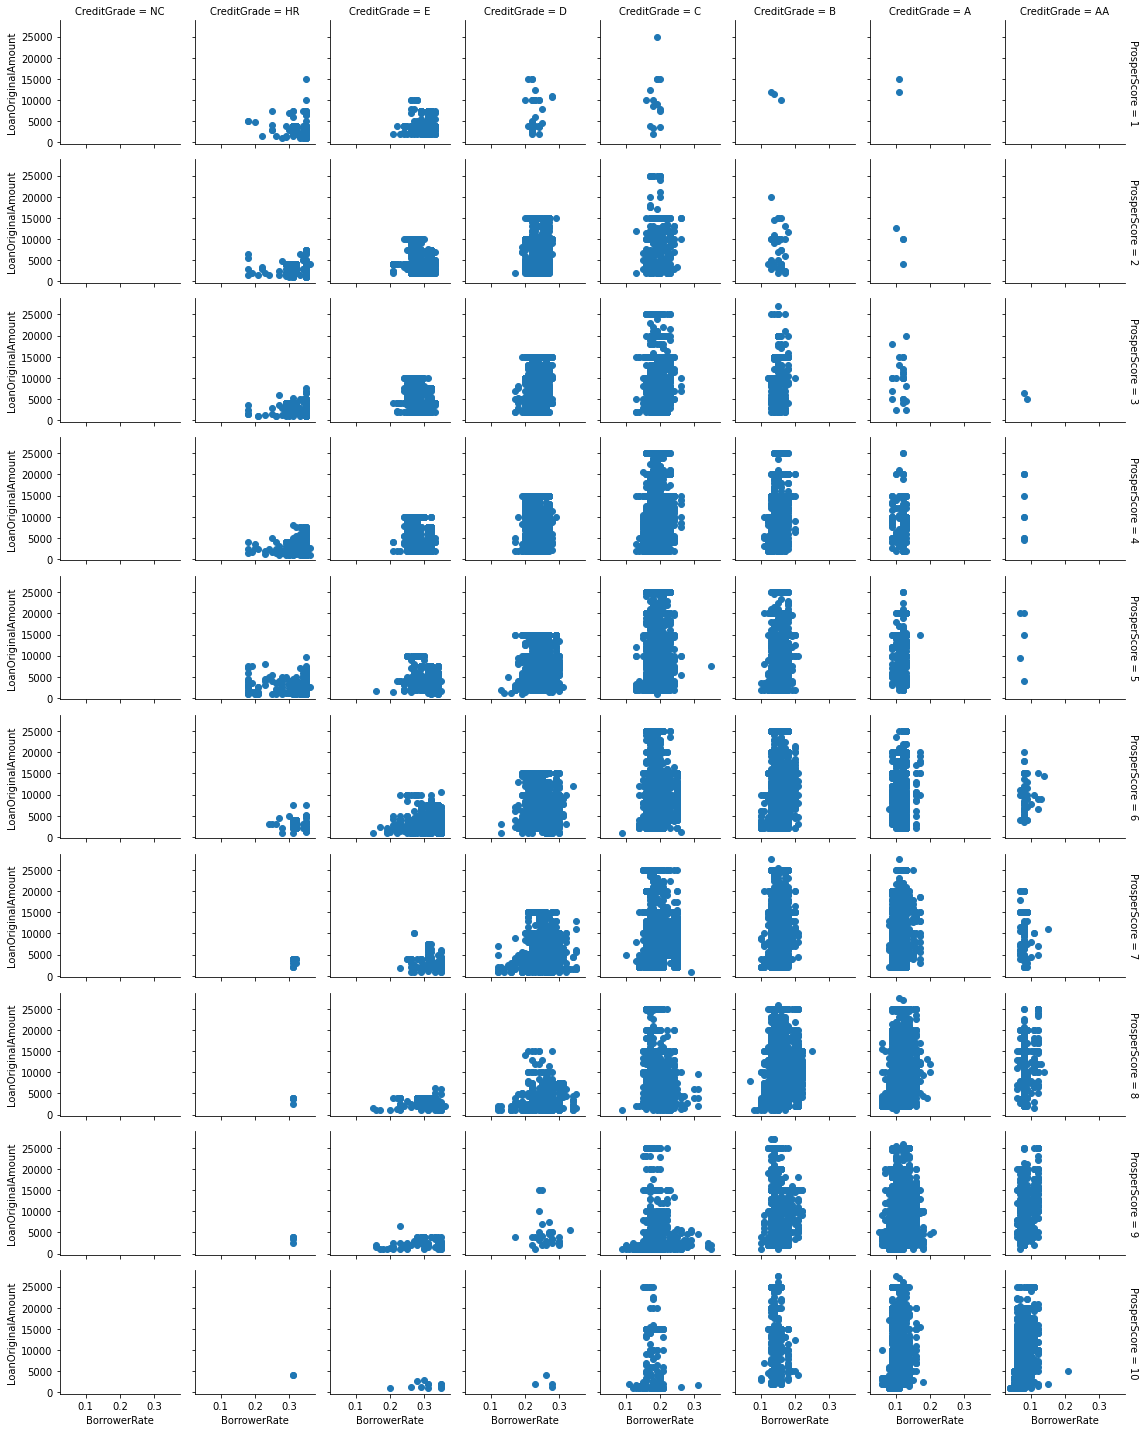

In [97]:
g = sb.FacetGrid(data=ploanx, col = 'CreditGrade', row  = 'ProsperScore', size=2, margin_titles = True );
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount');

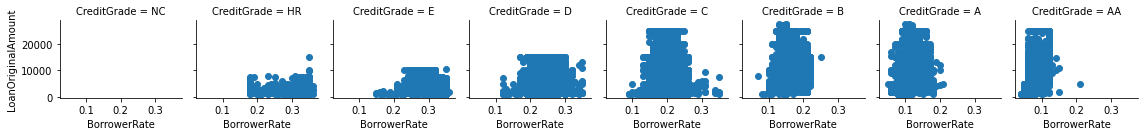

In [98]:
g = sb.FacetGrid(data=ploanx, col = 'CreditGrade' , size=2, margin_titles = True );
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount');

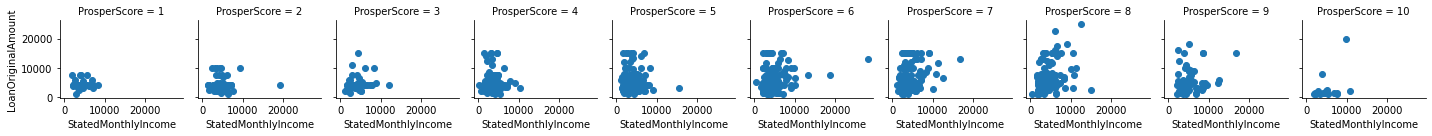

In [99]:
#Filtered data for only defaulters

g = sb.FacetGrid(data=loan_default,  col = 'ProsperScore', size=2, margin_titles = True );
g.map(plt.scatter, 'StatedMonthlyIncome', 'LoanOriginalAmount');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


As Credit Grading increases, interest rate decreases with increasing loan amount.

Most defauletrs had low credit ratings and low loan amount.


### Were there any interesting or surprising interactions between features?

> Most of loans were with average prosper score ratings. Could it imply that those with good ratings rarely apply for loans?

## Conclusions

1. Good credit ratigngs results in lower interest rates. 

2. Most defaulted Loans were mostly by Borrowers with lower stated Monthly income, poor credit ratings and  hence higher interest rates.

3. Bigger loans  amounts results in bigger yields. 

4. Term doesnt affect interest rates.

5. Good credit grading gives good prosper scores.





> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [100]:
ploanx.to_csv('ploanx')